In [1321]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import glob
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMAResults
#pip install pmdarima
import pmdarima
from pmdarima import auto_arima
from pmdarima.arima import ADFTest
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### We are going to look in your current folder for all the .csv files (you should have your .csv files in the same folder as your notebook) and save their content into a dataframe

In [668]:
file_list = list(glob.iglob('*.csv'))
file_list.sort(reverse=True)

li = []

for filename in file_list:
    df = pd.read_csv(filename, index_col='Datetime', header=0, parse_dates=True)
    li.append(df)
frame = pd.concat(li, axis=0)

In [669]:
file_list

['webfilternew_cleaned.csv',
 'webfilter_cleaned.csv',
 'listnew_cleaned.csv',
 'ipsnew_cleaned.csv',
 'ips_cleaned.csv']

In [1279]:
frame.head()

,count
Datetime,
2020-01-31 10:14:44,1
2020-01-31 10:14:43,1
2020-01-31 10:14:43,1
2020-01-31 10:14:42,1
2020-01-31 10:14:42,1


In [670]:
frame.drop(columns='Unnamed: 0', inplace = True)

#### We are creating a new column in the dataframe and initializing it with 1, which will be useful when determining the number of grouped occurences

In [671]:
frame['count'] = 1

In [672]:
frame.head()

,count
Datetime,
2020-01-31 10:14:44,1
2020-01-31 10:14:43,1
2020-01-31 10:14:43,1
2020-01-31 10:14:42,1
2020-01-31 10:14:42,1


In [761]:
frame.index

DatetimeIndex(['2020-01-31 10:14:44', '2020-01-31 10:14:43',
               '2020-01-31 10:14:43', '2020-01-31 10:14:42',
               '2020-01-31 10:14:42', '2020-01-31 10:14:42',
               '2020-01-31 10:14:42', '2020-01-31 10:14:41',
               '2020-01-31 10:14:42', '2020-01-31 10:14:41',
               ...
               '2020-06-21 21:43:26', '2020-06-21 23:38:12',
               '2020-06-22 01:17:43', '2020-06-22 01:39:21',
               '2020-06-22 02:46:40', '2020-06-22 03:14:44',
               '2020-06-22 04:32:38', '2020-06-22 10:50:21',
               '2020-06-22 10:50:21', '2020-06-22 11:21:23'],
              dtype='datetime64[ns]', name='Datetime', length=2398083, freq=None)

# HOURLY DATA

#### We are creating a new dataframe in which we will store and count how many times the event occured grouped by date and hour

In [1207]:
df_hour = frame.groupby(pd.DatetimeIndex(frame.index).date).resample('1h').count()

In [1208]:
df_hour

count
           Datetime                  
2019-12-08 2019-12-08 20:00:00     28
           2019-12-08 21:00:00      0
           2019-12-08 22:00:00      1
           2019-12-08 23:00:00      1
2019-12-09 2019-12-09 00:00:00      2
           2019-12-09 01:00:00      3
           2019-12-09 02:00:00      2
           2019-12-09 03:00:00      1
           2019-12-09 04:00:00      0
           2019-12-09 05:00:00     23
           2019-12-09 06:00:00      1
           2019-12-09 07:00:00      3
           2019-12-09 08:00:00      1
           2019-12-09 09:00:00      2
           2019-12-09 10:00:00      1
           2019-12-09 11:00:00      2
           2019-12-09 12:00:00      1
           2019-12-09 13:00:00      5
           2019-12-09 14:00:00      1
           2019-12-09 15:00:00      3
           2019-12-09 16:00:00      2
           2019-12-09 17:00:00      0
           2019-12-09 18:00:00      0
           2019-12-09 19:00:00      5
           2019-12-09 20:00:00      0
           2019-12-09 21:00:00      0
           2019-12-09 22:00:00      3
           2019-12-09 23:00:00      1
2019-12-10 2019-12-10 01:00:00      2
           2019-12-10 02:00:00      2
...                               ...
2020-06-21 2020-06-21 05:00:00      3
           2020-06-21 06:00:00      2
           2020-06-21 07:00:00      2
           2020-06-21 08:00:00      1
           2020-06-21 09:00:00      1
           2020-06-21 10:00:00      3
           2020-06-21 11:00:00      7
           2020-06-21 12:00:00      0
           2020-06-21 13:00:00      1
           2020-06-21 14:00:00      1
           2020-06-21 15:00:00      3
           2020-06-21 16:00:00      0
           2020-06-21 17:00:00      0
           2020-06-21 18:00:00      3
           2020-06-21 19:00:00      1
           2020-06-21 20:00:00      1
           2020-06-21 21:00:00      1
           2020-06-21 22:00:00      0
           2020-06-21 23:00:00      1
2020-06-22 2020-06-22 01:00:00      2
           2020-06-22 02:00:00      1
           2020-06-22 03:00:00      1
           2020-06-22 04:00:00      1
           2020-06-22 05:00:00      0
           2020-06-22 06:00:00      0
           2020-06-22 07:00:00      0
           2020-06-22 08:00:00      0
           2020-06-22 09:00:00      0
           2020-06-22 10:00:00      2
           2020-06-22 11:00:00      1

[3051 rows x 1 columns]

#### The dataframe created above has a multiindex, but the first level is irrelevant to us, so we will ignore it

In [1209]:
df_hour.index = df_hour.index.get_level_values(1)

In [1210]:
df_hour.describe()

,count
count,3051.000000
mean,785.999017
std,4147.206888
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,125386.000000


In [1019]:
df_hour.index = pd.to_datetime(df_hour.index)
df_hour.index

DatetimeIndex(['2019-12-08 20:00:00', '2019-12-08 21:00:00',
               '2019-12-08 22:00:00', '2019-12-08 23:00:00',
               '2019-12-09 00:00:00', '2019-12-09 01:00:00',
               '2019-12-09 02:00:00', '2019-12-09 03:00:00',
               '2019-12-09 04:00:00', '2019-12-09 05:00:00',
               ...
               '2020-06-22 02:00:00', '2020-06-22 03:00:00',
               '2020-06-22 04:00:00', '2020-06-22 05:00:00',
               '2020-06-22 06:00:00', '2020-06-22 07:00:00',
               '2020-06-22 08:00:00', '2020-06-22 09:00:00',
               '2020-06-22 10:00:00', '2020-06-22 11:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=3051, freq=None)

#### We need to set the frequency of the index in order to be able to use it in our prediction

In [1238]:
df_hour = df_hour.asfreq('H')

In [1239]:
df_hour.index

DatetimeIndex(['2019-12-08 20:00:00', '2019-12-08 21:00:00',
               '2019-12-08 22:00:00', '2019-12-08 23:00:00',
               '2019-12-09 00:00:00', '2019-12-09 01:00:00',
               '2019-12-09 02:00:00', '2019-12-09 03:00:00',
               '2019-12-09 04:00:00', '2019-12-09 05:00:00',
               ...
               '2020-06-22 02:00:00', '2020-06-22 03:00:00',
               '2020-06-22 04:00:00', '2020-06-22 05:00:00',
               '2020-06-22 06:00:00', '2020-06-22 07:00:00',
               '2020-06-22 08:00:00', '2020-06-22 09:00:00',
               '2020-06-22 10:00:00', '2020-06-22 11:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=4720, freq='H')

In [1246]:
df_hour['count'] = df_hour['count'].fillna(df_hour['count'].quantile(0.83))

#### We are getting rid of the noise present in our data

In [1033]:
df_hour.quantile(0.83)

count    33.5
Name: 0.83, dtype: float64

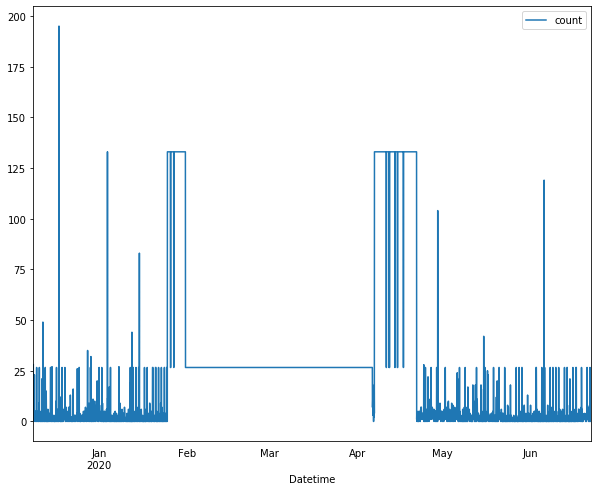

In [1247]:
df_hour.plot(figsize=(10,8))

In [1013]:
df_hour.describe()

,count
count,4720.000000
mean,785.999017
std,3334.115436
min,0.000000
25%,1.000000
50%,5.000000
75%,785.999017
max,125386.000000


In [1014]:
print(df_hour['count'].quantile(0.01))
print(df_hour['count'].quantile(0.8))

0.0
785.9990167158309


In [1214]:

df_hour['count'] = np.where(df_hour['count'] > 785.999017, 785.999017,df_hour['count'])
print(df_hour['count'].skew())

1.7853404260035064


In [1215]:
df_hour.describe()

,count
count,3051.000000
mean,132.983124
std,291.731233
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,785.999017


In [1216]:
df_hour['count'] = np.where(df_hour['count'] == 785.999017, 132.983124,df_hour['count'])

In [1217]:
df_hour.describe()

,count
count,3051.000000
mean,26.608526
std,65.580246
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,761.000000


In [1252]:
df_hour['count'] = np.where(df_hour['count'] > 200, 26.608526 ,df_hour['count'])
df_hour['count'] = np.where(df_hour['count'] > 75, 26.608526 ,df_hour['count'])

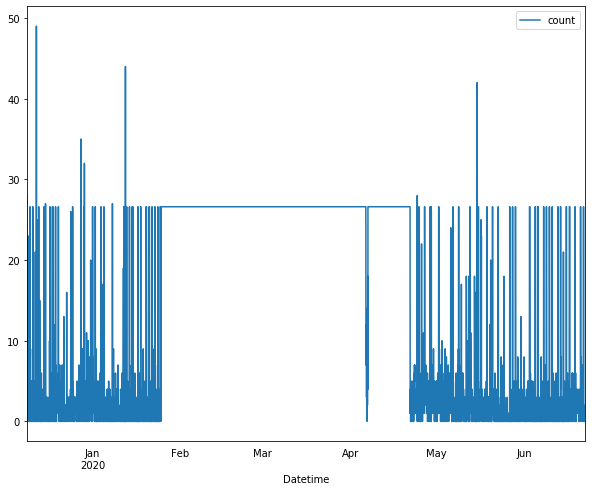

In [1253]:
df_hour.plot(figsize=(10,8))

In [1280]:

adf_test = ADFTest(alpha=0.5)
adf_test.should_diff(df_hour)

(0.3256997279938617, False)

#### The result of the above test implies the series is not stationary which implies we will be using the Integrated concept,
#### denoted by the d value.

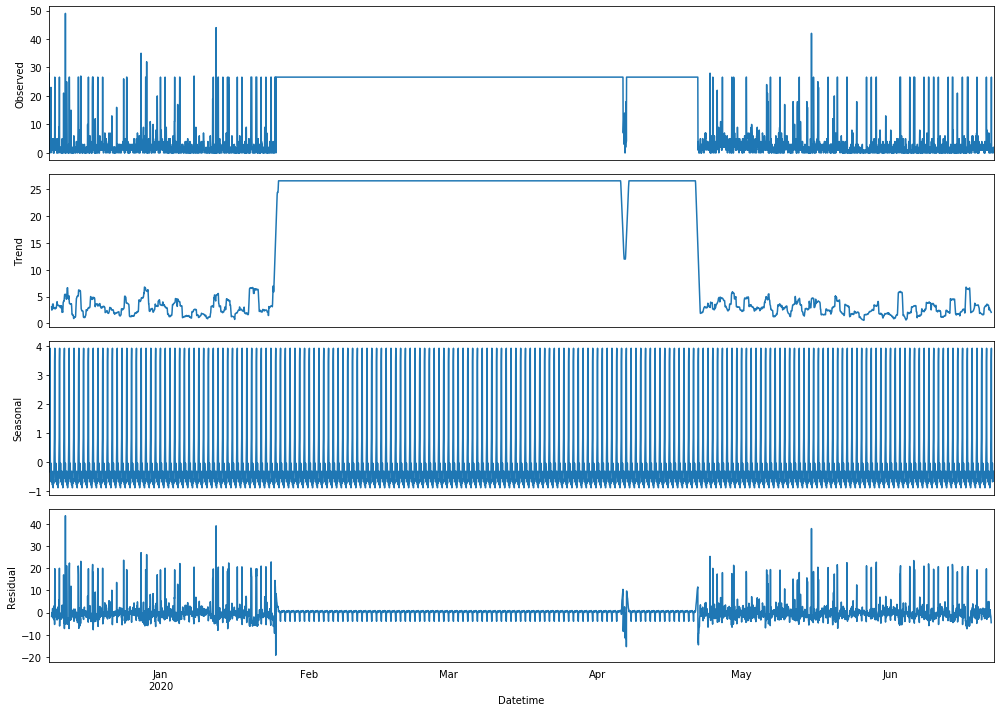

In [1285]:
result = seasonal_decompose(df_hour['count'], model='add', freq=24)
plt.rcParams['figure.figsize'] = (14,10)
result.plot();

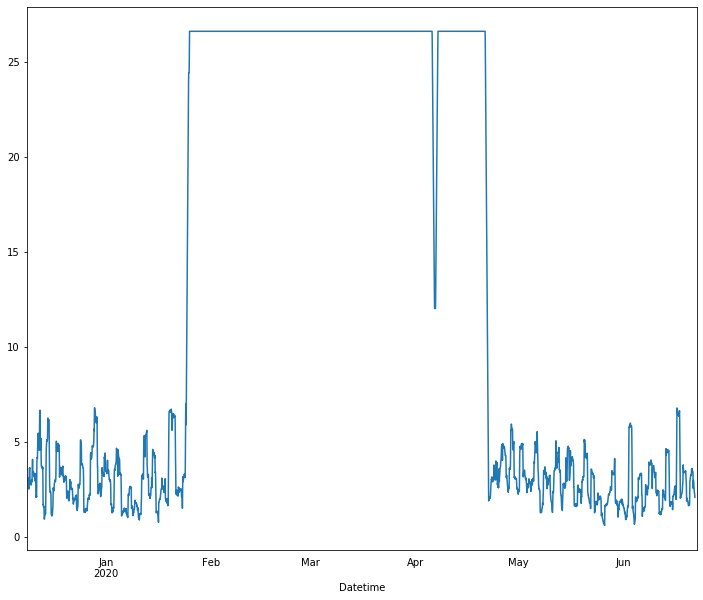

In [1294]:
result.trend.plot(figsize=(12,10))

#### We are going to use auto_arima in order to automatically discover the optimal order for the ARIMA model.
#### The auto-ARIMA process seeks to identify the most optimal
#### parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
#### We have already concluded that the d value is going to be used.

# Dending on your computer, running the models will take a while. Please be patient.

In [1223]:
auto_arima(df_hour['count'], seasonal = True, m=24, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=23370.140, Time=10.41 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=23952.346, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=23569.318, Time=1.38 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=23404.879, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=23950.347, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=23368.406, Time=6.85 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=23371.630, Time=1.26 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=23369.085, Time=35.92 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=23368.664, Time=8.11 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=23363.841, Time=66.44 sec


/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=86.80 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=23362.703, Time=67.41 sec
 ARIMA(2,1,2)(2,0,0)[24] intercept   : AIC=23368.127, Time=42.09 sec
 ARIMA(1,1,2)(2,0,1)[24] intercept   : AIC=23368.071, Time=50.06 sec


/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



 ARIMA(2,1,1)(2,0,1)[24] intercept   : AIC=23367.029, Time=65.64 sec
 ARIMA(3,1,2)(2,0,1)[24] intercept   : AIC=23364.002, Time=61.46 sec
 ARIMA(2,1,3)(2,0,1)[24] intercept   : AIC=23363.334, Time=74.35 sec
 ARIMA(1,1,1)(2,0,1)[24] intercept   : AIC=23369.412, Time=40.27 sec
 ARIMA(1,1,3)(2,0,1)[24] intercept   : AIC=23361.337, Time=60.45 sec
 ARIMA(1,1,3)(1,0,1)[24] intercept   : AIC=23368.303, Time=9.63 sec
 ARIMA(1,1,3)(2,0,0)[24] intercept   : AIC=23366.496, Time=28.11 sec
 ARIMA(1,1,3)(2,0,2)[24] intercept   : AIC=inf, Time=104.98 sec
 ARIMA(1,1,3)(1,0,0)[24] intercept   : AIC=23366.750, Time=5.47 sec
 ARIMA(1,1,3)(1,0,2)[24] intercept   : AIC=23362.393, Time=63.79 sec
 ARIMA(0,1,3)(2,0,1)[24] intercept   : AIC=23364.047, Time=60.69 sec
 ARIMA(1,1,4)(2,0,1)[24] intercept   : AIC=23363.335, Time=49.52 sec
 ARIMA(0,1,2)(2,0,1)[24] intercept   : AIC=23375.435, Time=65.44 sec
 ARIMA(0,1,4)(2,0,1)[24] intercept   : AIC=23363.642, Time=47.04 sec


/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,1,4)(2,0,1)[24] intercept   : AIC=23365.215, Time=96.87 sec
 ARIMA(1,1,3)(2,0,1)[24]             : AIC=23359.339, Time=18.45 sec
 ARIMA(1,1,3)(1,0,1)[24]             : AIC=23366.305, Time=3.03 sec
 ARIMA(1,1,3)(2,0,0)[24]             : AIC=23364.498, Time=7.12 sec


/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,1,3)(2,0,2)[24]             : AIC=inf, Time=50.19 sec
 ARIMA(1,1,3)(1,0,0)[24]             : AIC=23364.752, Time=1.91 sec
 ARIMA(1,1,3)(1,0,2)[24]             : AIC=23360.395, Time=25.30 sec
 ARIMA(0,1,3)(2,0,1)[24]             : AIC=23362.049, Time=11.72 sec
 ARIMA(1,1,2)(2,0,1)[24]             : AIC=23366.077, Time=13.93 sec
 ARIMA(2,1,3)(2,0,1)[24]             : AIC=23361.335, Time=24.11 sec
 ARIMA(1,1,4)(2,0,1)[24]             : AIC=23361.337, Time=14.46 sec
 ARIMA(0,1,2)(2,0,1)[24]             : AIC=23373.437, Time=9.96 sec
 ARIMA(0,1,4)(2,0,1)[24]             : AIC=23361.644, Time=12.56 sec
 ARIMA(2,1,2)(2,0,1)[24]             : AIC=23360.705, Time=22.10 sec
 ARIMA(2,1,4)(2,0,1)[24]             : AIC=23363.246, Time=20.08 sec

Best model:  ARIMA(1,1,3)(2,0,1)[24]          
Total fit time: 1447.907 seconds


ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(2, 0, 1, 24),
      with_intercept=False)

In [1200]:
train = df_hour.iloc[:len(df_hour)-720]
test = df_hour.iloc[len(df_hour)-720:]

In [1145]:
len(test)

720

In [1146]:
len(train)

4000

# Dending on your computer, running the models will take a while. Please be patient.

In [1299]:
model = SARIMAX(train['count'], order= (1,1,3), seasonal_order=(2, 0, 5, 24))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                 4000
Model:             SARIMAX(1, 1, 3)x(2, 0, 5, 24)   Log Likelihood               -9991.542
Date:                            Wed, 11 Nov 2020   AIC                          20007.083
Time:                                    09:22:51   BIC                          20082.609
Sample:                                12-08-2019   HQIC                         20033.855
                                     - 05-23-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7366      0.221     -3.335      0.001      -1.170      -0.304
ma.L1          0.0013      0.221      0.006      0.995      -0.432       0.435
ma.L2         -0.6598      0.167     -3.946      0.000      -0.987      -0.332
ma.L3         -0.1119      0.026     -4.300      0.000      -0.163      -0.061
ar.S.L24       0.2829      0.131      2.165      0.030       0.027       0.539
ar.S.L48       0.6694      0.129      5.185      0.000       0.416       0.922
ma.S.L24      -0.2762      0.132     -2.088      0.037      -0.536      -0.017
ma.S.L48      -0.6445      0.129     -5.014      0.000      -0.896      -0.393
ma.S.L72       0.0869      0.011      7.608      0.000       0.064       0.109
ma.S.L96      -0.0238      0.018     -1.333      0.183      -0.059       0.011
ma.S.L120    7.27e-06      0.016      0.000      1.000      -0.032       0.032
sigma2         8.6432      0.062    139.785      0.000       8.522       8.764
===================================================================================
Ljung-Box (Q):                       65.81   Jarque-Bera (JB):             73684.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             3.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1306]:
start = len(train)
end = len(train) + len(test) -1

In [1307]:
predictions = results.predict(start, end, type='levels').rename('SARIMA Test Predictions')

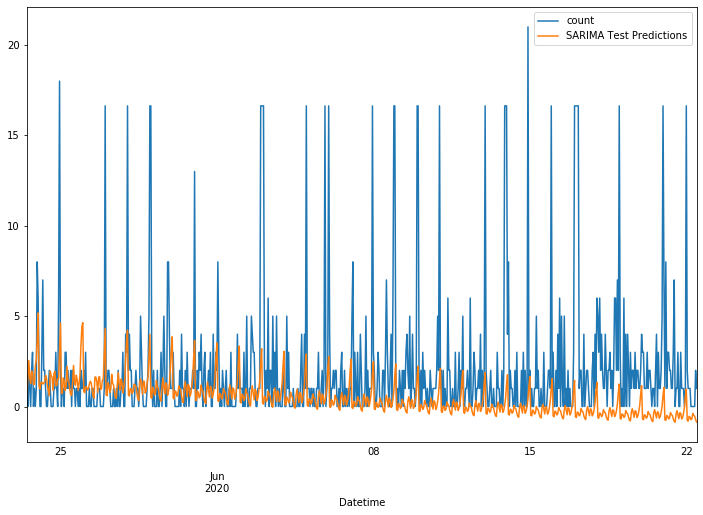

In [1302]:
test['count'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

#### Calculating the  root-mean-square error (RMSE) which is a frequently used to #### measure the differences between values 
#### (sample or population values) predicted by a model or an estimator and the #### values observed in reference to the test data

In [1276]:
rmse(test['count'], predictions)

3.8555924492854565

# Dending on your computer, running the models will take a while. Please be patient.

In [1303]:
model = SARIMAX(df_hour['count'], order= (1,1,3), seasonal_order=(2, 0, 5, 24))
results = model.fit()
fcast = results.predict(n_periods=720,end = len(df_hour) +24, type='levels').rename('SARIMA forecast')

/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



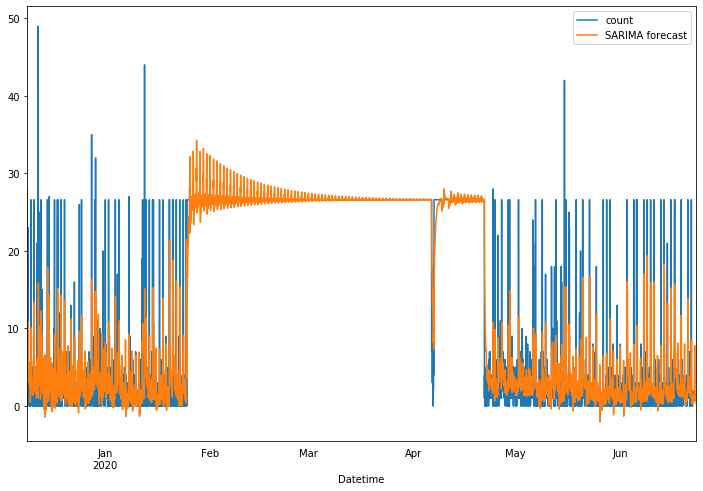

In [1308]:
df_hour['count'].plot(figsize=(12A,8), legend=True)
fcast.plot(legend=True)

/Users/andreiturbatu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



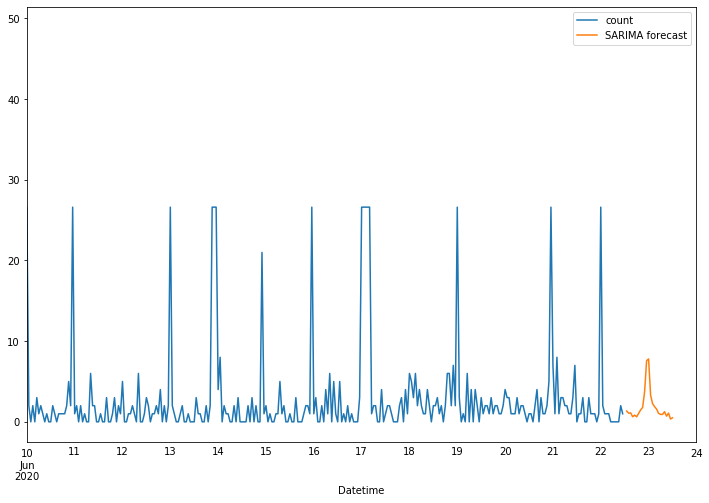

In [1320]:
df_hour['count'].plot(figsize=(12,8), legend=True)
fcast.tail(24).plot(legend=True)
ax=plt.subplot(111)
ax.set_xlim('2020-06-10 00:00:00', '2020-06-24 00:00:00')
dim=np.arange(1,24,1);


#### Calculating the  root-mean-square error (RMSE) which is a frequently used to 
#### measure the differences between values 
#### (sample or population values) predicted by a model or an estimator and the 
#### values observed in reference to the entire data set

In [1310]:
rmse(df_hour['count'], fcast[:4720])


4.186559887749913

#### Creating a single dataframe in which we store the results predicted next to our actual data

In [1311]:
df_result = pd.merge(df_hour, fcast, how='outer', left_index=True, right_index=True)

In [1312]:
df_result.iloc[-720:]

,count,SARIMA forecast
2020-05-24 13:00:00,1.0,3.411851
2020-05-24 14:00:00,0.0,1.281063
2020-05-24 15:00:00,0.0,1.046311
2020-05-24 16:00:00,0.0,-0.009835
2020-05-24 17:00:00,1.0,1.351354
2020-05-24 18:00:00,1.0,1.309461
2020-05-24 19:00:00,3.0,0.382281
2020-05-24 20:00:00,1.0,1.350853
2020-05-24 21:00:00,0.0,1.537092
2020-05-24 22:00:00,6.0,0.506899
